# Binary Predictors in a Logistic Regression

Using the same code as in the previous exercise, find the odds of 'duration'. 

What do they tell you?

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load the data

Load the ‘Bank_data.csv’ dataset.

In [2]:
raw_data = pd.read_csv('datasets/Bank-data.csv')
raw_data

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4,4.856,0.0,1.0,0.0,0.0,157.0,no
...,...,...,...,...,...,...,...,...
513,513,1.334,0.0,1.0,0.0,0.0,204.0,no
514,514,0.861,0.0,0.0,2.0,1.0,806.0,yes
515,515,0.879,0.0,0.0,0.0,0.0,290.0,no
516,516,0.877,0.0,0.0,5.0,1.0,473.0,yes


In [3]:
data = raw_data.copy()
data = data.drop(['Unnamed: 0'], axis = 1)
data['Subscription'] = raw_data['y'].map({'yes': 1, 'no': 0})

In [4]:
data

,interest_rate,credit,march,may,previous,duration,y,Subscription
0,1.334,0.0,1.0,0.0,0.0,117.0,no,0
1,0.767,0.0,0.0,2.0,1.0,274.0,yes,1
2,4.858,0.0,1.0,0.0,0.0,167.0,no,0
3,4.120,0.0,0.0,0.0,0.0,686.0,yes,1
4,4.856,0.0,1.0,0.0,0.0,157.0,no,0
...,...,...,...,...,...,...,...,...
513,1.334,0.0,1.0,0.0,0.0,204.0,no,0
514,0.861,0.0,0.0,2.0,1.0,806.0,yes,1
515,0.879,0.0,0.0,0.0,0.0,290.0,no,0
516,0.877,0.0,0.0,5.0,1.0,473.0,yes,1


### Declare the dependent and independent variables

Use 'duration' as the independet variable.

In [5]:
y = data['Subscription']
x1 = data['duration']

### Simple Logistic Regression

Run the regression.

In [6]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y, x)
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


In [7]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Subscription   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Wed, 07 Oct 2020   Pseudo R-squ.:                  0.2121
Time:                        16:48:57   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

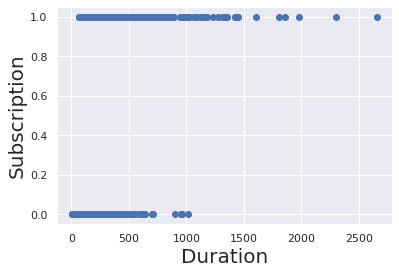

In [8]:
plt.scatter(x1,y,color = 'C0')
plt.xlabel('Duration', fontsize = 20)
plt.ylabel('Subscription', fontsize = 20)
plt.show()

### Find the odds of duration

In [9]:
np.exp(0.0051)

1.005113027136717

The duration don't don't have influence on subscriptions of the clients when measured by a day, although that variable is import due the P (~0.00) values

### Confusion Matrix

In [10]:
def confusion_matrix(data, actual_values, model):
    pred_values = model.predict(data)
    bins = np.array([0, 0.5, 1])
    cm = np.histogram2d(actual_values, pred_values, bins = bins)[0]
    accuracy = (cm[0,0] + cm[1,1])/cm.sum()
    return cm, accuracy

In [11]:
confusion_matrix(x, y, results_log)

(array([[204.,  55.],
        [104., 155.]]),
 0.693050193050193)